In [1]:
library("phyloseq")
packageVersion("phyloseq")

library("biomformat")
packageVersion("biomformat")

library("ggplot2")
packageVersion("ggplot2")

library("vegan")
packageVersion('vegan')

[1] ‘1.26.1’

[1] ‘1.10.1’

[1] ‘3.2.0’

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-5


[1] ‘2.5.5’

In [2]:
theme_set(theme_classic())

In [3]:
biom_data <- import_biom(BIOMfilename = "table-with-taxa.biom", 
                         treefilename = "tree.nwk")
mapping_file <- import_qiime_sample_data(mapfilename = "16s-metadata-with-counts.tsv")
physeq.a <- merge_phyloseq(biom_data, mapping_file)

Warning message in strsplit(conditionMessage(e), "\n"):
“input string 1 is invalid in this locale”

In [4]:
colnames(tax_table(physeq.a))= c("Kingdom","Phylum","Class","Order","Family","Genus", "Species")

In [5]:
physeq.a

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 945 taxa and 93 samples ]
sample_data() Sample Data:       [ 93 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 945 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 945 tips and 943 internal nodes ]

In [6]:
#sample_names(physeq.a)

## Split into whole, live, dead samples

In [7]:
whole.samples <- c("T1R1","T1R4","T1R5","T1R7","T1R9","T1R10","T2R1","T2R4","T2R5","T2R7","T2R9","T2R10","T3R1","T3R4","T3R5","T3R7","T3R9","T3R10","T4R1","T4R4","T4R5","T4R7","T4R9","T4R10","T5R1","T5R4","T5R5","T5R7","T5R9","T5R10")
live.samples <- c("T2R1L","T2R4L","T2R5L","T2R7L","T2R9L","T3R1L","T3R4L","T3R5L","T3R7L","T3R9L","T3R10L","T4R1L","T4R4L","T4R5L","T4R7L","T4R9L","T4R10L","T5R1L","T5R4L","T5R5L","T5R7L","T5R9L","T5R10L")
dead.samples <- c("T2R1D","T2R4D","T2R5D","T2R7D","T2R9D","T2R10D","T3R1D","T3R4D","T3R5D","T3R7D","T3R9D","T3R10D","T4R1D","T4R4D","T4R5D","T4R7D","T4R9D","T4R10D","T5R1D","T5R4D","T5R5D","T5R7D","T5R9D","T5R10D")

In [8]:
length(whole.samples)
length(live.samples)
length(dead.samples)

[1] 30

[1] 23

[1] 24

In [9]:
physeq.whole <- subset_samples(physeq.a, SampleID %in% whole.samples)
physeq.live <- subset_samples(physeq.a, SampleID %in% live.samples)
physeq.dead <- subset_samples(physeq.a, SampleID %in% dead.samples)

In [10]:
sample_data(physeq.whole)

,SampleID,BarcodeSequence,Linker,Material,Sampling,Coupon,TimePoint,Live_Dead,Count,Count_Rounded
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
T1R1,T1R1,TACCGCTTCTTC,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T1,whole,132871.58,100000
T1R10,T1R10,ACTCCTTGTGTT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R10,T1,whole,480586.81,500000
T1R4,T1R4,TGTGCGATAACA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R4,T1,whole,25988.12,30000
T1R5,T1R5,GATTATCGACGA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R5,T1,whole,32959.53,30000
T1R7,T1R7,GCCTAGCCCAAT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R7,T1,whole,147266.00,100000
T1R9,T1R9,GATGTATGTGGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R9,T1,whole,110449.50,100000
T2R1,T2R1,GTCACGGACATT,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T2,whole,19869.22,20000
T2R10,T2R10,TCACCTCCTTGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R10,T2,whole,204769.87,200000
T2R4,T2R4,GCGAGCGAAGTA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R4,T2,whole,30899.56,30000


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   26.0   113.5   897.0  3963.7  3506.0 26580.0 

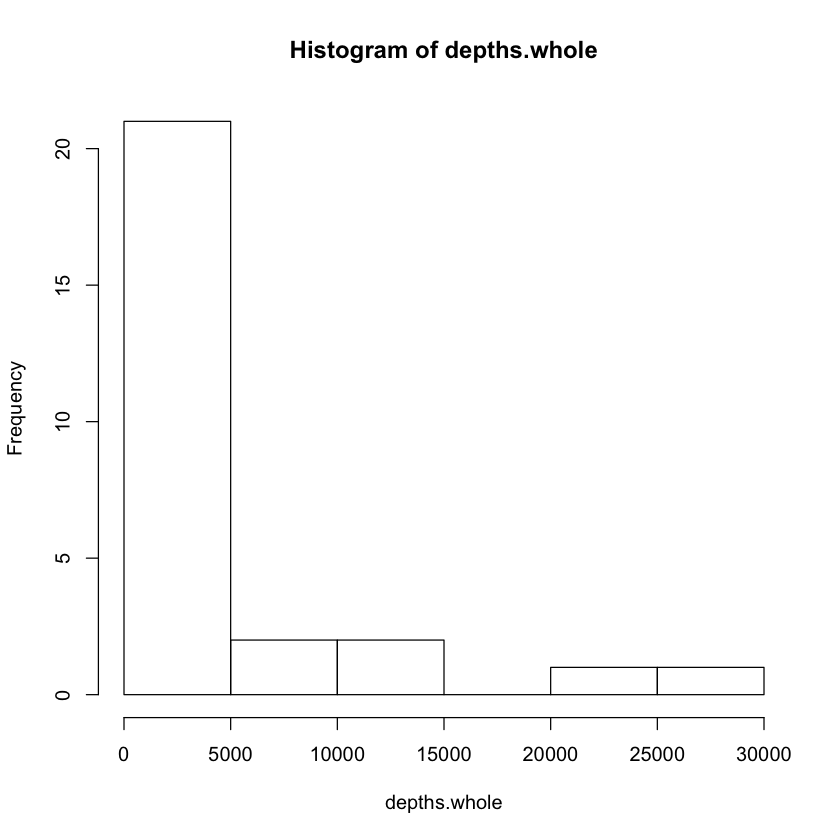

In [11]:
depths.whole <- sample_sums(physeq.whole)
summary(depths.whole)
hist(depths.whole)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    162    1558    2276    3288    3966   12251 

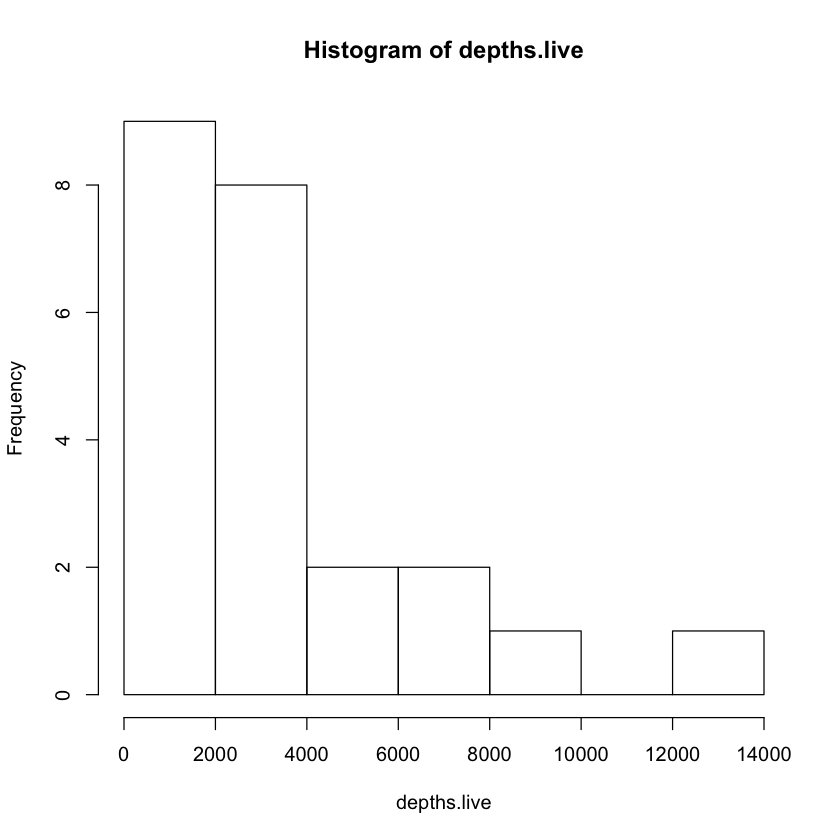

In [12]:
depths.live <- sample_sums(physeq.live)
summary(depths.live)
hist(depths.live)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    192    1144    2398    3632    4764   17009 

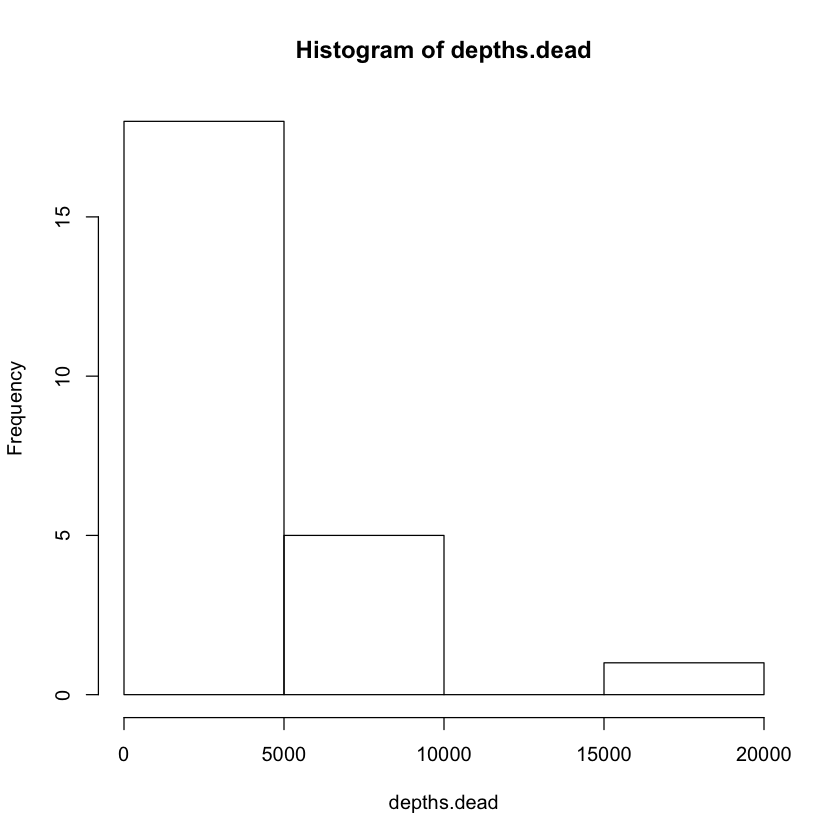

In [13]:
depths.dead <- sample_sums(physeq.dead)
summary(depths.dead)
hist(depths.dead)

# Relative abundance

## Whole samples

In [14]:
physeq.whole.percent <- transform_sample_counts(physeq.whole, function(x) 100 * x/sum(x))

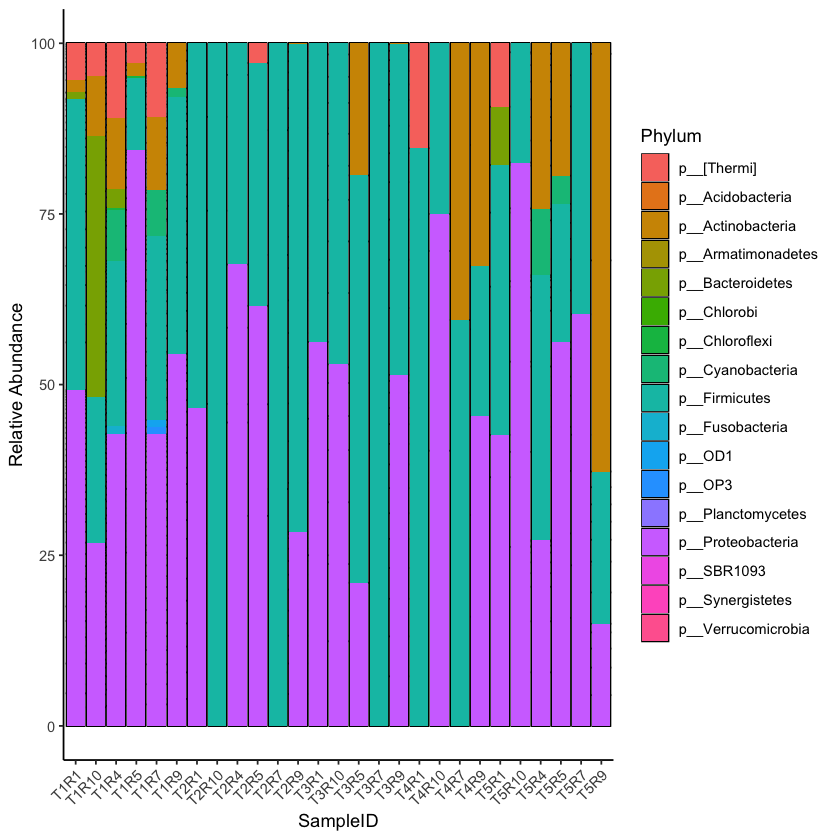

In [15]:
p.w.rel <- plot_bar(physeq.whole.percent, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.w.rel + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance")

### Subset samples by material

### Gypsum

In [11]:
physeq.w.percent.gyp <- subset_samples(physeq.whole.percent, Material == "Gypsum")

In [12]:
sample_data(physeq.w.percent.gyp)

,SampleID,BarcodeSequence,Linker,Material,Sampling,Coupon,TimePoint,Live_Dead,Count,Count_Rounded
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
T1R10,T1R10,ACTCCTTGTGTT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R10,T1,whole,480586.81,500000
T1R7,T1R7,GCCTAGCCCAAT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R7,T1,whole,147266.00,100000
T1R9,T1R9,GATGTATGTGGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R9,T1,whole,110449.50,100000
T2R10,T2R10,TCACCTCCTTGT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R10,T2,whole,204769.87,200000
T2R7,T2R7,ACTTGGTGTAAG,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R7,T2,whole,63732.76,60000
T2R9,T2R9,TCTTGGAGGTCA,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R9,T2,whole,505530.76,500000
T3R10,T3R10,TACTCGGGAACT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R10,T3,whole,852039.00,900000
T3R7,T3R7,AGCTGTCAAGCT,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R7,T3,whole,420760.00,400000
T3R9,T3R9,GAGAGCAACAGA,CCGGACTACHVGGGTWTCTAAT,Gypsum,Resample,R9,T3,whole,477863.14,500000


In [13]:
sample_data(physeq.w.percent.gyp)$Coupon_sorted = factor(sample_data(physeq.w.percent.gyp)$Coupon, levels=c('R7','R9','R10'))

In [15]:
pdf("16S-whole-rel-gyp.pdf")
theme_set(theme_classic())
p.w.g <- plot_bar(physeq.w.percent.gyp, x="TimePoint", fill="Phylum") 
p.w.g + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)
dev.off()

pdf 
  2

### MDF

In [16]:
physeq.w.percent.mdf <- subset_samples(physeq.whole.percent, Material == "MDF")

In [17]:
sample_data(physeq.w.percent.mdf)

,SampleID,BarcodeSequence,Linker,Material,Sampling,Coupon,TimePoint,Live_Dead,Count,Count_Rounded
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
T1R1,T1R1,TACCGCTTCTTC,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T1,whole,132871.58,100000
T1R4,T1R4,TGTGCGATAACA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R4,T1,whole,25988.12,30000
T1R5,T1R5,GATTATCGACGA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R5,T1,whole,32959.53,30000
T2R1,T2R1,GTCACGGACATT,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T2,whole,19869.22,20000
T2R4,T2R4,GCGAGCGAAGTA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R4,T2,whole,30899.56,30000
T2R5,T2R5,ATCTACCGAAGC,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R5,T2,whole,19284.83,20000
T3R1,T3R1,GCACACCTGATA,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T3,whole,93969.73,90000
T3R5,T3R5,TCATGCTCCATT,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R5,T3,whole,41457.24,40000
T4R1,T4R1,CGTGCTTAGGCT,CCGGACTACHVGGGTWTCTAAT,MDF,Resample,R1,T4,whole,39446.25,40000


In [18]:
pdf("16S-whole-rel-mdf.pdf")
p.w.m <- plot_bar(physeq.w.percent.mdf, x="TimePoint", fill="Phylum")
p.w.m + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon)), nrow=1)
dev.off()

pdf 
  2

## Live samples

In [17]:
physeq.l.percent <- transform_sample_counts(physeq.live, function(x) 100 * x/sum(x))

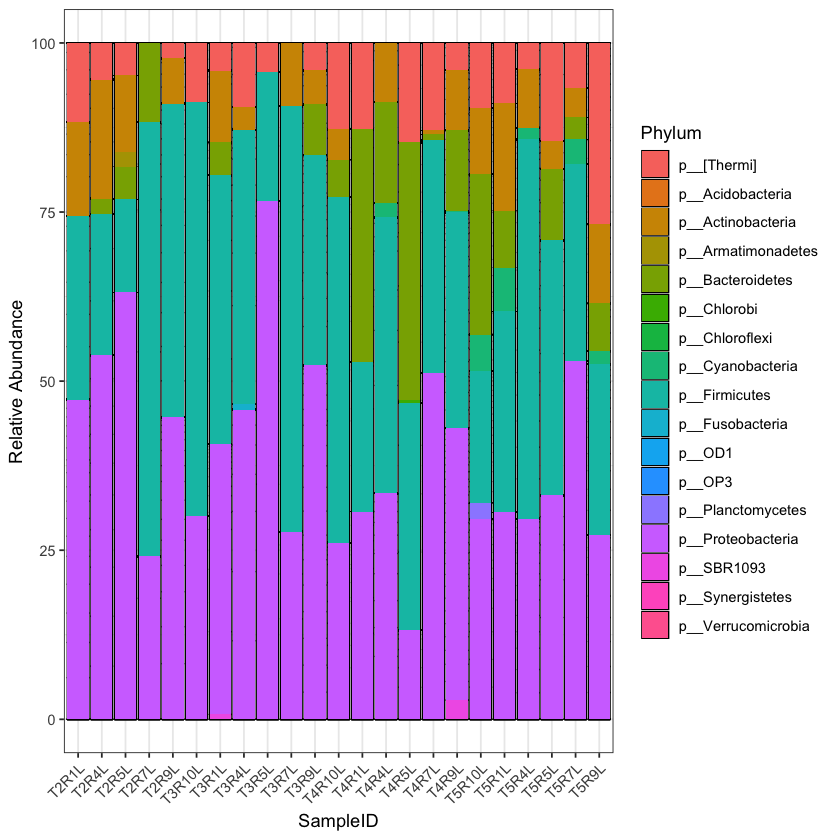

In [39]:
p.l.rel <- plot_bar(physeq.l.percent, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.l.rel + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance")

### Subset samples by material

### Gypsum

In [40]:
physeq.l.percent.gyp <- subset_samples(physeq.l.percent, Material == "Gypsum")

In [41]:
sample_data(physeq.l.percent.gyp)$Coupon_sorted = factor(sample_data(physeq.l.percent.gyp)$Coupon, levels=c('R7','R9','R10'))

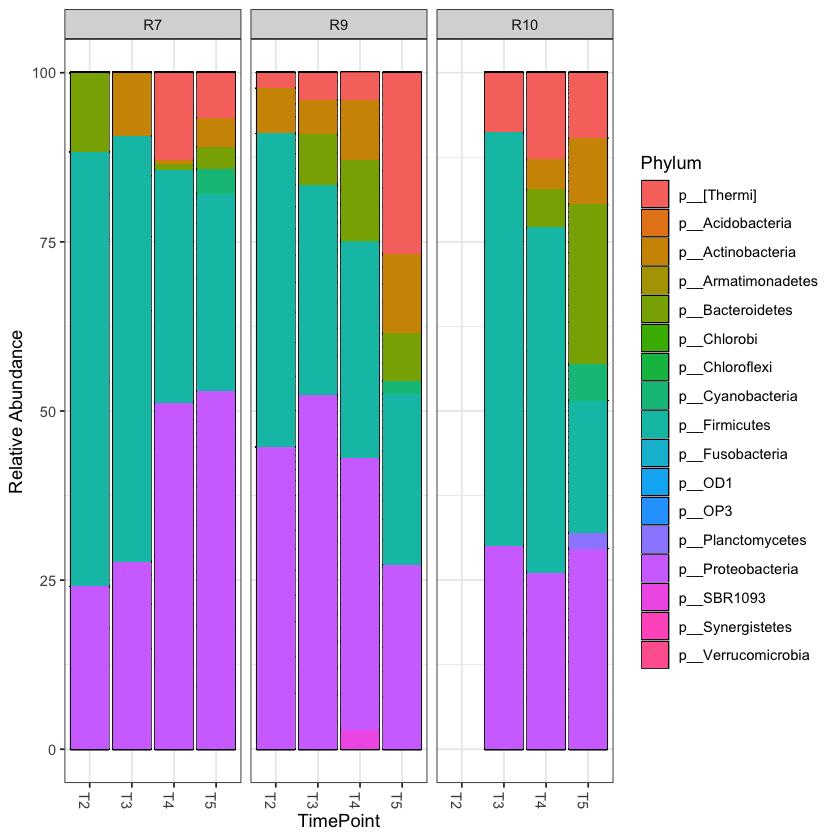

In [42]:
p.l.g <- plot_bar(physeq.l.percent.gyp, x="TimePoint", fill="Phylum") 
p.l.g + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)

### MDF

In [43]:
physeq.l.percent.mdf <- subset_samples(physeq.l.percent, Material == "MDF")

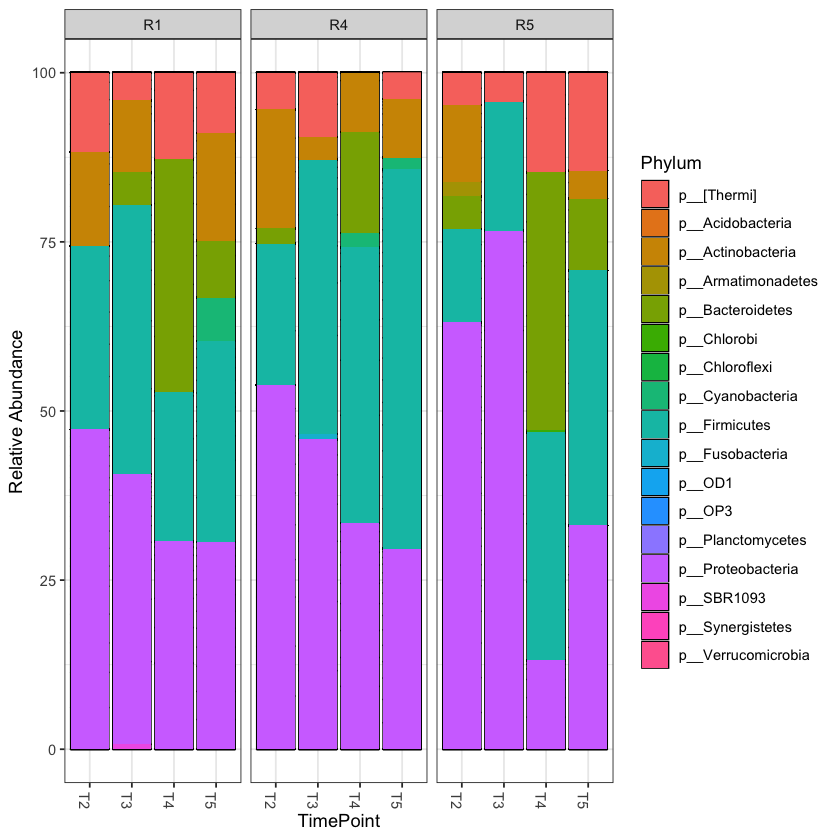

In [44]:
p.l.m <- plot_bar(physeq.l.percent.mdf, x="TimePoint", fill="Phylum") 
p.l.m + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon)), nrow=1)

## Dead samples

In [18]:
physeq.d.percent <- transform_sample_counts(physeq.dead, function(x) 100 * x/sum(x))                                              

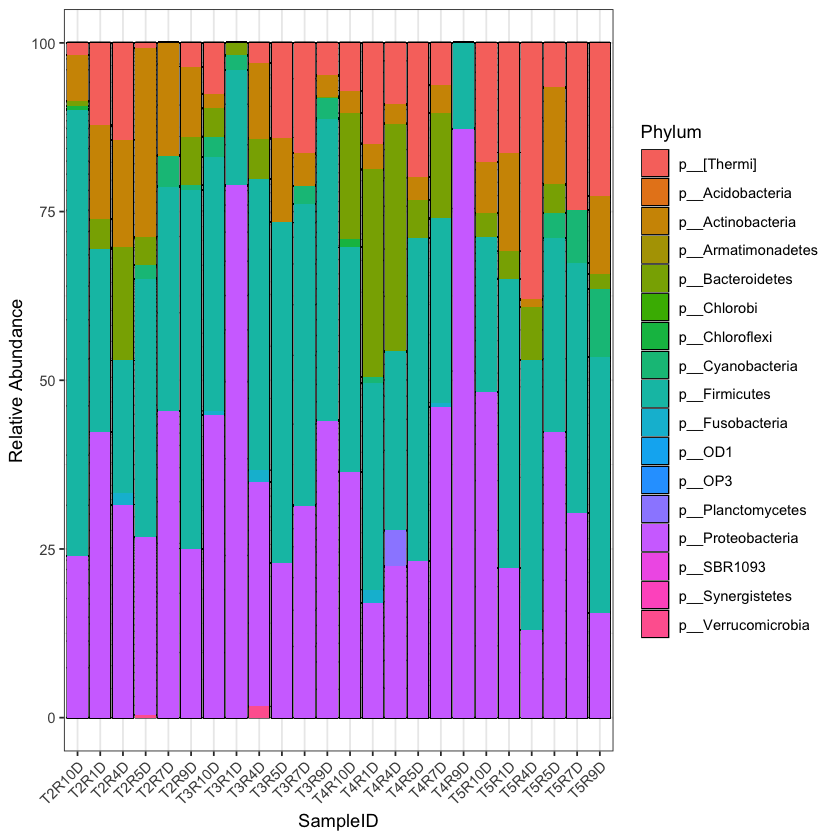

In [46]:
p.d.rel <- plot_bar(physeq.d.percent, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.d.rel + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance")

### Subset samples by material

### Gypsum

In [47]:
physeq.d.percent.gyp <- subset_samples(physeq.d.percent, Material == "Gypsum")

In [48]:
sample_data(physeq.d.percent.gyp)$Coupon_sorted = factor(sample_data(physeq.d.percent.gyp)$Coupon, levels=c('R7','R9','R10'))

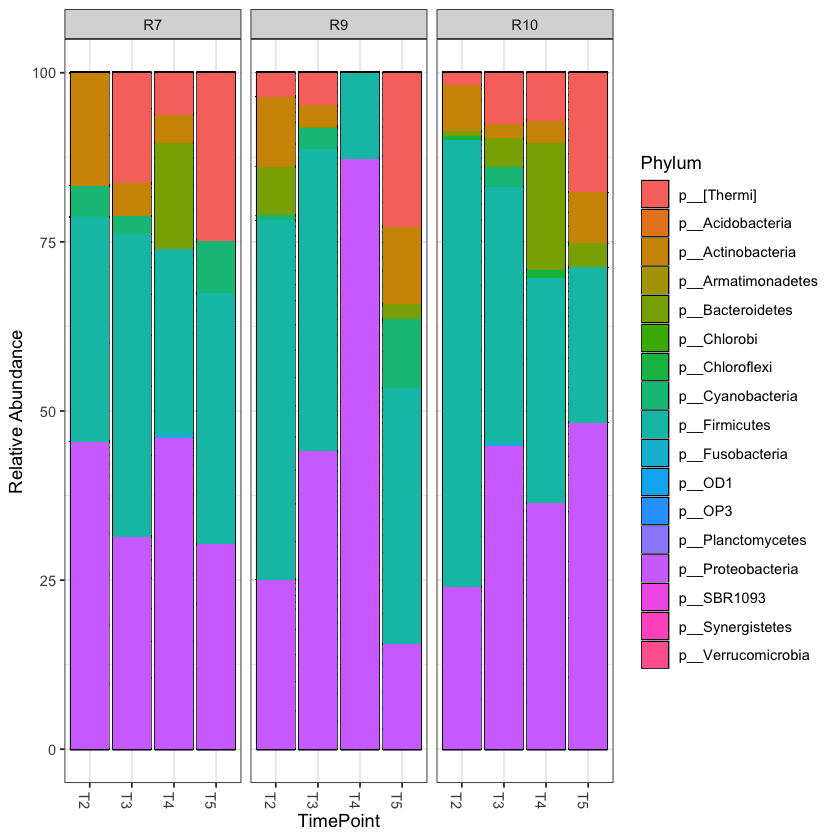

In [49]:
p.d.g <- plot_bar(physeq.d.percent.gyp, x="TimePoint", fill="Phylum") 
p.d.g + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)

### MDF

In [50]:
physeq.d.percent.mdf <- subset_samples(physeq.d.percent, Material == "MDF")

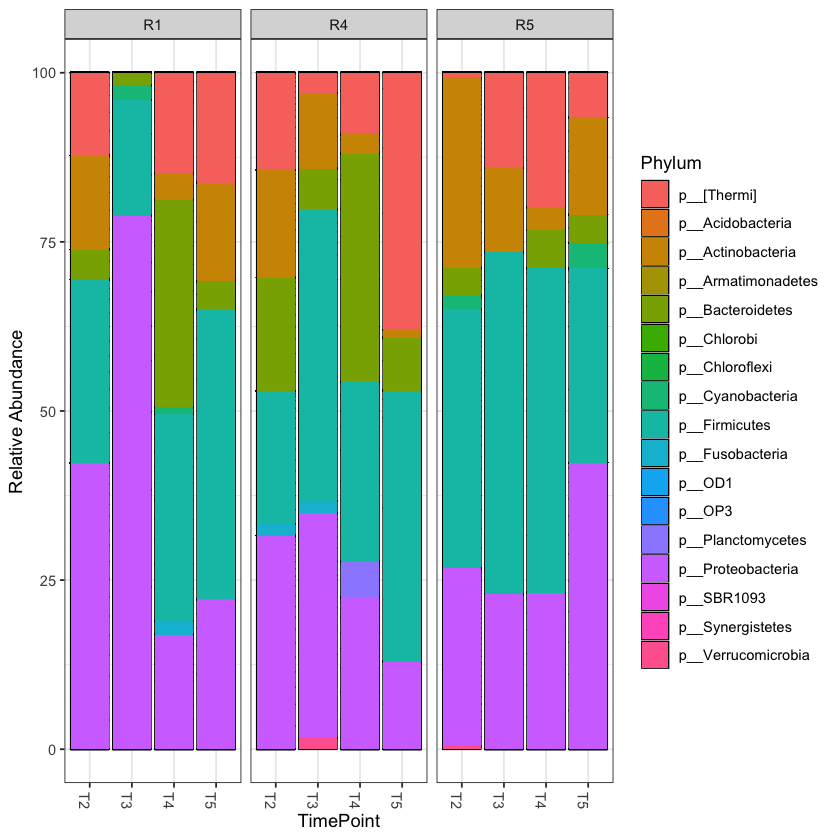

In [51]:
p.d.m <- plot_bar(physeq.d.percent.mdf, x="TimePoint", fill="Phylum") 
p.d.m + geom_bar(stat = "identity", position = "stack") + ylab("Relative Abundance") + facet_wrap((vars(Coupon)), nrow=1)

# Quantitative abundance

In [19]:
# get counts
#sample_data(physeq.whole.percent)[,9]
count.whole <- as.data.frame(sample_data(physeq.whole.percent))$Count
count.live <- as.data.frame(sample_data(physeq.l.percent))$Count
count.dead <- as.data.frame(sample_data(physeq.d.percent))$Count

In [20]:
# function to convert relative abundance to quantitative abundance

rel_to_quan <- function(physeq, counts) {
    for (i in 1:nsamples(physeq)) {
        otu_table(physeq)[,i] = get_taxa(physeq, sample_names(physeq)[i]) * counts[i] /100
    }
    return(otu_table(physeq))
}

## Whole samples

In [21]:
physeq.w.quan <- physeq.whole.percent
# replace relative otu table with a new quantitative one by using rel_to_quan function
otu_table(physeq.w.quan) <- rel_to_quan(physeq.w.quan, count.whole)

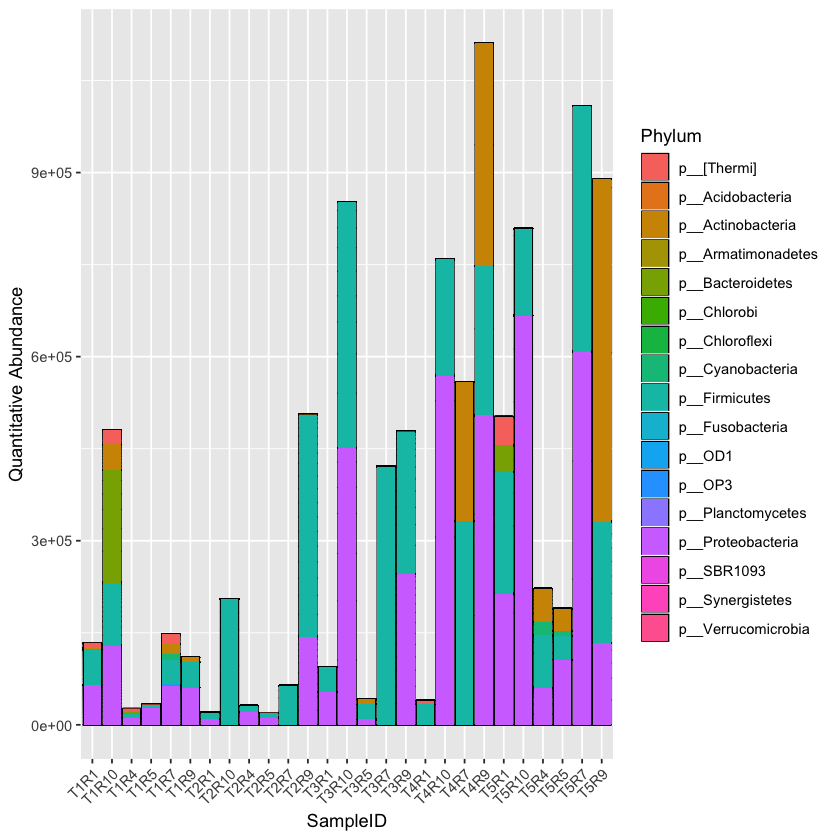

In [30]:
p.w.quan <- plot_bar(physeq.w.quan, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.w.quan + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance")

In [22]:
physeq.w.quan.gyp <- subset_samples(physeq.w.quan, Material == "Gypsum")

In [23]:
sample_data(physeq.w.quan.gyp)$Coupon_sorted = factor(sample_data(physeq.w.quan.gyp)$Coupon, levels=c('R7','R9','R10'))

In [24]:
pdf("16S-whole-quan-gyp.pdf")
p.w.quan.g <- plot_bar(physeq.w.quan.gyp, x="TimePoint", fill="Phylum") 
p.w.quan.g + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)
dev.off()

pdf 
  2

In [25]:
physeq.w.quan.mdf <- subset_samples(physeq.w.quan, Material == "MDF")

In [26]:
pdf("16S-whole-quan-mdf.pdf")
p.w.quan.m <- plot_bar(physeq.w.quan.mdf, x="TimePoint", fill="Phylum") 
p.w.quan.m + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon)), nrow=1)
dev.off()

pdf 
  2

## Live samples

In [27]:
physeq.l.quan <- physeq.l.percent
# replace relative otu table with a new quantitative one by using rel_to_quan function
otu_table(physeq.l.quan) <- rel_to_quan(physeq.l.quan, count.live)

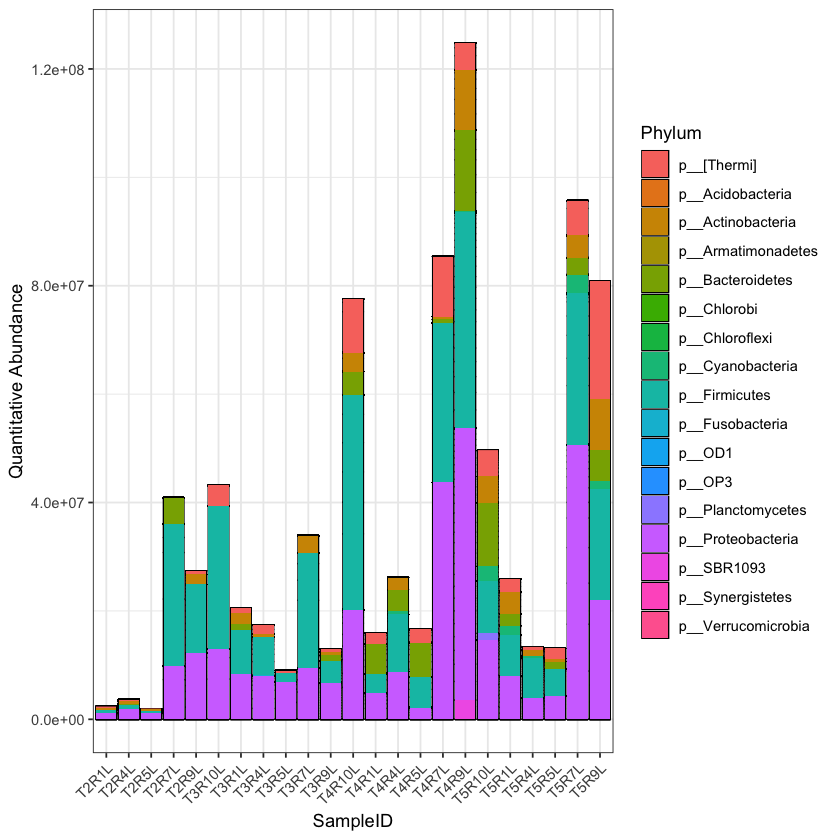

In [58]:
p.l.quan <- plot_bar(physeq.l.quan, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.l.quan + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance")

In [28]:
physeq.l.quan.gyp <- subset_samples(physeq.l.quan, Material == "Gypsum")
sample_data(physeq.l.quan.gyp)$Coupon_sorted = factor(sample_data(physeq.l.quan.gyp)$Coupon, levels=c('R7','R9','R10'))

In [29]:
pdf("16S-live-quan-gyp2.pdf")
p.l.quan.g <- plot_bar(physeq.l.quan.gyp, x="TimePoint", fill="Phylum") 
p.l.quan.g + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)
dev.off()

pdf 
  2

In [30]:
physeq.l.quan.mdf <- subset_samples(physeq.l.quan, Material == "MDF")

In [31]:
pdf("16S-live-quan-mdf2.pdf")
p.l.quan.m <- plot_bar(physeq.l.quan.mdf, x="TimePoint", fill="Phylum") 
p.l.quan.m + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon)), nrow=1)
dev.off()

pdf 
  2

## Dead samples

In [32]:
physeq.d.quan <- physeq.d.percent
# replace relative otu table with a new quantitative one by using rel_to_quan function
otu_table(physeq.d.quan) <- rel_to_quan(physeq.d.quan, count.dead)

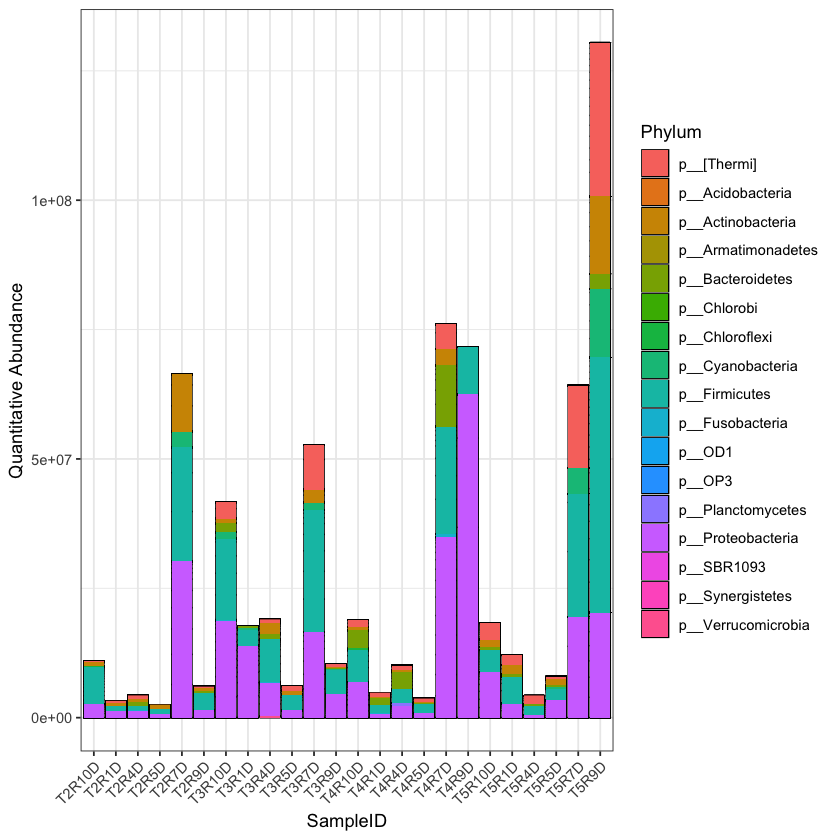

In [69]:
p.d.quan <- plot_bar(physeq.d.quan, x="SampleID", fill="Phylum") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p.d.quan + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance")

In [33]:
physeq.d.quan.gyp <- subset_samples(physeq.d.quan, Material == "Gypsum")
sample_data(physeq.d.quan.gyp)$Coupon_sorted = factor(sample_data(physeq.d.quan.gyp)$Coupon, levels=c('R7','R9','R10'))

In [34]:
pdf("16S-dead-quan-gyp2.pdf")
p.d.quan.g <- plot_bar(physeq.d.quan.gyp, x="TimePoint", fill="Phylum") 
p.d.quan.g + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon_sorted)), nrow=1)
dev.off()

pdf 
  2

In [35]:
physeq.d.quan.mdf <- subset_samples(physeq.d.quan, Material == "MDF")

In [36]:
pdf("16S-dead-quan-mdf2.pdf")
p.d.quan.m <- plot_bar(physeq.d.quan.mdf, x="TimePoint", fill="Phylum") 
p.d.quan.m + geom_bar(stat = "identity", position = "stack") + ylab("Quantitative Abundance") + facet_wrap((vars(Coupon)), nrow=1)
dev.off()

pdf 
  2